In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.manifold import TSNE

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score

from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
import pickle

file_path = "../wav2vec2_vectors/pooled/layer_reprs_large_pooled_pt.pkl"

with open(file_path, "rb") as file:
    layer_reprs = pickle.load(file)


In [4]:
file_path = "../wav2vec2_vectors/pooled/layer_reprs_large_pooled_ft.pkl"

with open(file_path, "rb") as file:
    layer_reprs_ft_asr = pickle.load(file)


In [5]:
file_path = "../wav2vec2_vectors/pooled/layer_reprs_large_pooled_ft_s2t.pkl"

with open(file_path, "rb") as file:
    layer_reprs_ft_s2t = pickle.load(file)


In [6]:
import os

audio_folder = 'spoken_digit/speech_data'
audio_files = []

for file in os.listdir(audio_folder):
    if file.endswith('.wav') or file.endswith('.mp3'):
        audio_files.append(os.path.join(audio_folder, file))



In [7]:

metadata = {}

for file in audio_files:
    file_name = os.path.basename(file)
    label, speaker_id, sample_number = file_name.split('_')
    
    # Store metadata
    metadata[file_name] = {
        'label': label,
        'speaker_id': speaker_id,
        'sample_number': sample_number.split('.')[0]
    }


In [8]:
metadata[audio_files[0].split('/')[-1]]

{'label': '4', 'speaker_id': 'nicolas', 'sample_number': '28'}

In [9]:
# Get metadata in lists 
# Iterate over the layers and plot the representations
speaker_ids, labels = [], []

for sample_ID in layer_reprs:
    speaker_id = metadata[sample_ID]['speaker_id']
    label = int(metadata[sample_ID]['label'])

    speaker_ids.append(speaker_id)
    labels.append(label)

In [10]:
digit2word = {
    0: 'zero',
    1: 'one',
    2: 'two',
    3: 'three',
    4: 'four',
    5: 'five',
    6: 'six',
    7: 'seven',
    8: 'eight',
    9: 'nine'
}

In [11]:
type(layer_reprs)

collections.defaultdict

In [12]:
layer_reprs.keys()

dict_keys(['2_theo_29.wav', '5_nicolas_22.wav', '4_lucas_18.wav', '3_theo_22.wav', '8_lucas_27.wav', '1_yweweler_6.wav', '3_yweweler_22.wav', '6_yweweler_28.wav', '0_jackson_18.wav', '4_george_1.wav', '7_jackson_5.wav', '9_jackson_49.wav', '5_george_45.wav', '5_theo_11.wav', '9_lucas_3.wav', '1_george_44.wav', '8_lucas_0.wav', '8_yweweler_28.wav', '9_nicolas_42.wav', '4_jackson_26.wav', '1_yweweler_10.wav', '4_jackson_45.wav', '9_lucas_32.wav', '4_lucas_2.wav', '3_lucas_18.wav', '8_yweweler_46.wav', '8_nicolas_26.wav', '4_lucas_6.wav', '0_theo_28.wav', '5_jackson_24.wav', '6_nicolas_28.wav', '1_george_31.wav', '6_yweweler_44.wav', '4_jackson_4.wav', '6_george_19.wav', '1_nicolas_17.wav', '8_lucas_9.wav', '5_jackson_40.wav', '9_jackson_38.wav', '1_jackson_47.wav', '2_nicolas_10.wav', '2_theo_37.wav', '7_jackson_23.wav', '0_jackson_9.wav', '4_nicolas_10.wav', '1_george_47.wav', '7_george_40.wav', '3_yweweler_36.wav', '8_theo_34.wav', '4_theo_40.wav', '9_nicolas_28.wav', '4_theo_43.wav', 

In [13]:
layer_reprs['0_george_44.wav'][0].shape

(1024,)

In [27]:
def calculate_tsne_layer_representations(layer_reprs, apply_threshold=False):
    """
    Calculates T-SNE layer representations for each layer in the given layer representations.

    Args:
        layer_reprs (dict): A dictionary containing layer representations for each sample ID.

    Returns:
        list: A list of T-SNE layer representations for each layer.
    """
    tsne_layer_representations = []

    num_layers = len(layer_reprs[list(layer_reprs.keys())[0]])
    threshold = 100

    for layer_index in range(0, num_layers):
        # Extract representations from the specified layer
        layer_representations = []

        for sample_ID in layer_reprs:
            vec = layer_reprs[sample_ID][layer_index]

            if apply_threshold:
            
                vec = [x if x < threshold  else 0 for x in vec]
                vec = [x if x > -1*threshold  else 0 for x in vec]

            layer_representations.append(vec)
            #layer_representations.append(thresholded_vec)
            #layer_representations.append()

        # Convert the representations to a NumPy array
        layer_representations = np.array(layer_representations)

        #print(layer_representations.shape)

        # Perform T-SNE dimensionality reduction
        tsne = TSNE(n_components=2, random_state=42, perplexity=50)
        tsne_representation = tsne.fit_transform(layer_representations)

        tsne_layer_representations.append(tsne_representation)

    return tsne_layer_representations

In [15]:

# values1= layer_reprs[sample_ID][23]
# values2 = layer_reprs[sample_ID][22]
# values3 = layer_reprs[sample_ID][21]
# values4 = layer_reprs[sample_ID][20]
# values5 = layer_reprs[sample_ID][19]

# plt.hist(values1, bins=1000)
# plt.hist(values2, bins=1000)
# plt.hist(values3, bins=1000)
# plt.hist(values4, bins=1000)
# plt.hist(values5, bins=1000)
# plt.xscale('log')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title('Line Plot of layer_reprs[sample_ID][23]')
# plt.show()



In [16]:
# import matplotlib.pyplot as plt

# # Define the values
# values1 = layer_reprs[sample_ID][23]
# values2 = layer_reprs[sample_ID][22]
# values3 = layer_reprs[sample_ID][21]
# values4 = layer_reprs[sample_ID][20]
# values5 = layer_reprs[sample_ID][19]

# # Create a box plot
# fig, ax = plt.subplots(figsize=(6, 12))
# # Create a list of values
# _values = [values1, values2, values3, values4, values5]

# # Create a box plot
# plt.boxplot(_values)

# # Set the x-axis tick labels
# plt.xticks(range(1, len(_values) + 1), ['values1', 'values2', 'values3', 'values4', 'values5'])

# # Set the y-axis label
# plt.ylabel('Value')
# #plt.yscale('log')
# # Set the title of the plot
# plt.yticks(range(int(min(values1)), int(max(values1)), 1000))
# plt.title('Distribution of Values')
# plt.grid(axis='y', which='major', linestyle='--', linewidth=0.5)


# #plt.grid()
# # Show the plot
# plt.show()


In [39]:

def plot_tsne(tsne_representation, labels, label2word, figsave_name):
    """
    Plots 2D t-SNE representations for each layer.

    Parameters:
    - tsne_representation (list of numpy arrays): List of t-SNE representations for each layer.
    - labels (numpy array): Array of labels for each data point.
    - label2word (dict): Dictionary mapping label indices to corresponding words.

    Returns:
    - None

    This function plots t-SNE representations for each layer in a grid of subplots. Each subplot represents a layer,
    and the t-SNE representations are plotted as scatter plots. The color of each data point in the scatter plot
    corresponds to its label. The legend at the bottom of the plot shows the color labels and their corresponding words.
    """
    
    # Define the number of rows and columns for the subplot matrix
    num_rows = len(tsne_representation) // 5
    num_cols = 5

    # Create a new figure and set the size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 2*num_rows))

    # Flatten the axes array
    axes = axes.flatten()

    # Iterate over the layers and plot t-sne representations
    for i, tsne_rep in enumerate(tsne_representation):

        # Plot the representations in the current subplot
        scatter = axes[i].scatter(tsne_rep[:, 0], tsne_rep[:, 1], c=labels, cmap='tab10', alpha=0.1, marker='.')
        axes[i].set_title(f'Layer {i}', fontsize=10)
        axes[i].set_xticks([])
        axes[i].set_yticks([])

    # Remove any extra subplots
    for j in range(len(axes)):
        if j >= len(tsne_representation):
            fig.delaxes(axes[j])



    # Add legend with color labels at the bottom
    legend_labels = [label2word[i].upper() for i in np.unique(labels)]

    legend_handles = [
        plt.Line2D(
            [0], 
            [0], 
            marker='.', 
            color='w', 
            markerfacecolor=scatter.get_cmap()(scatter.norm(label)), markersize=10) for label in np.unique(labels)
        ]

    fig.legend(legend_handles, legend_labels, loc='lower center', ncol=len(legend_labels), bbox_to_anchor=(0.5, -0.05)) #
    
    # Adjust the spacing between subplots
    fig.tight_layout()
    fig.savefig('Figures/' + figsave_name, dpi=600,  bbox_inches='tight')

    plt.show()

In [40]:
tsne_layer_representations_ft_s2t = calculate_tsne_layer_representations(layer_reprs_ft_s2t)

In [19]:
#len(tsne_layer_representations_large_pt)

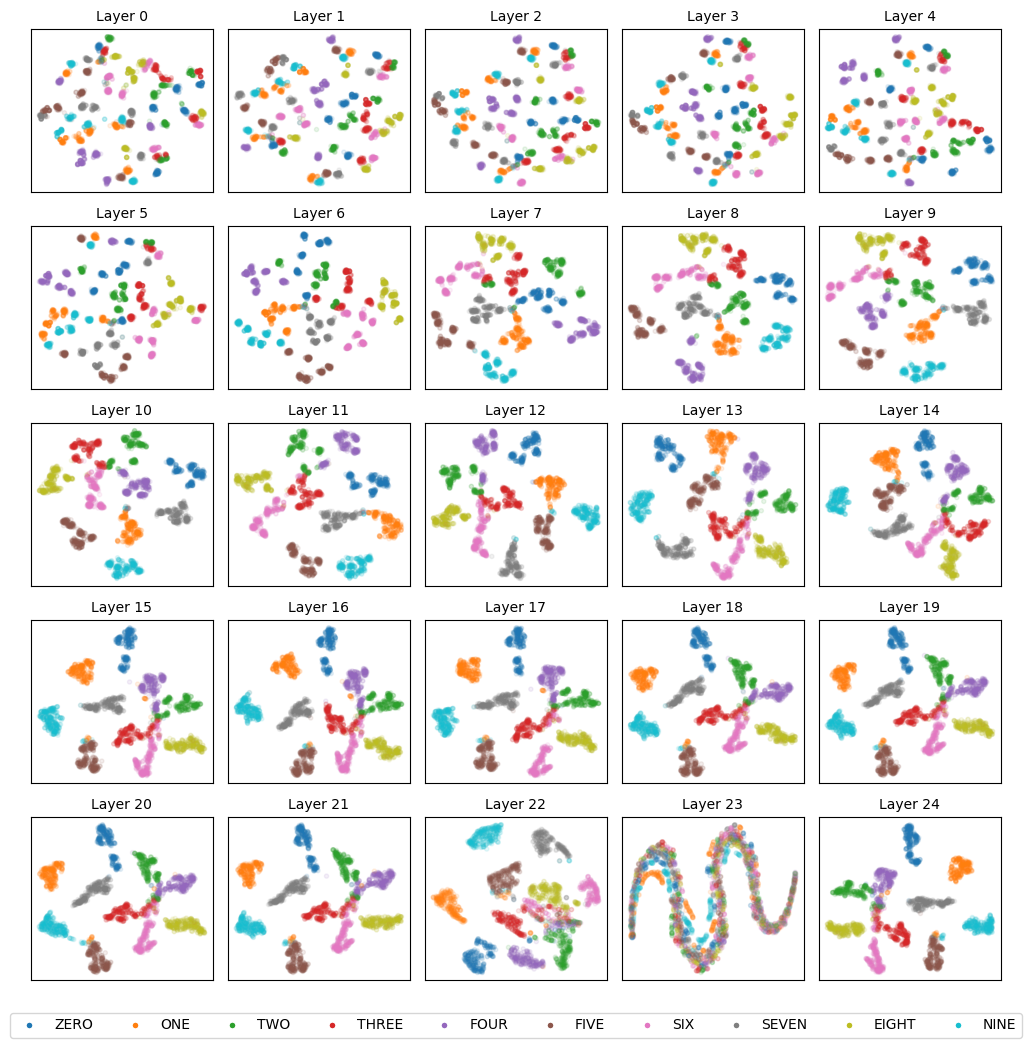

In [41]:
plot_tsne(tsne_layer_representations_ft_s2t, labels, digit2word, 'w2v2_large_ft_s2t.png')

In [42]:
from sklearn.preprocessing import LabelEncoder

# Convert the categorical list into a list of integers
label_encoder = LabelEncoder()
speaker_ids_encoded = label_encoder.fit_transform(speaker_ids)

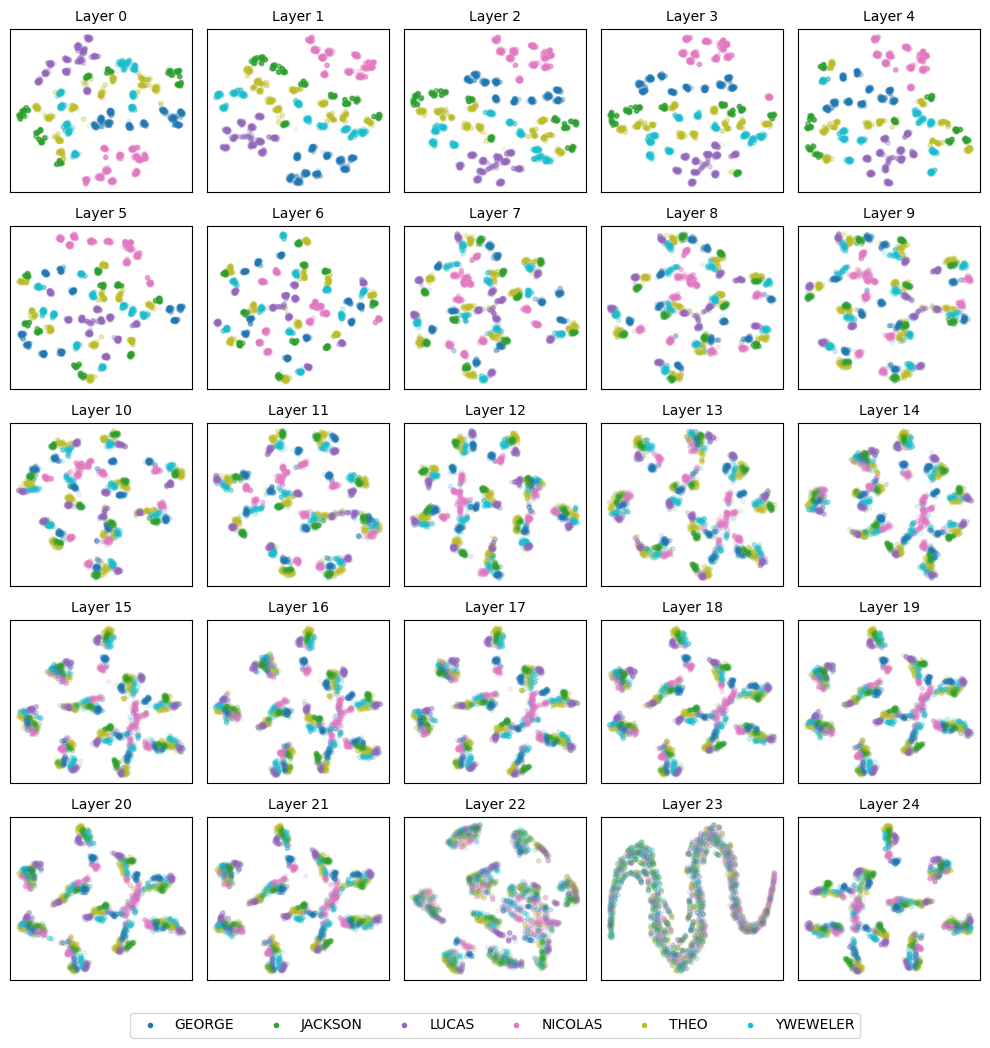

In [44]:
spkr2word = {i: spkr for (i, spkr) in enumerate(np.unique(speaker_ids))}

plot_tsne(tsne_layer_representations_ft_s2t, speaker_ids_encoded, spkr2word, 'w2v2_large_ft_s2t_spkr.png')
#plot_tsne(tsne_layer_representations_large_pt, speaker_ids_encoded, spkr2word, 'w2v2_large_pt_spkr.png')

In [23]:
#tsne_layer_representations_large_ft = calculate_tsne_layer_representations(layer_reprs_ft)

In [24]:
#plot_tsne(tsne_layer_representations_large_ft, labels, digit2word, 'w2v2_large_ft.png')

In [26]:
#plot_tsne(tsne_layer_representations_large_ft, speaker_ids_encoded, spkr2word, 'w2v2_large_ft_spkr.png')

In [45]:
def k_means(kmeans_paras, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    #t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans_paras).fit(data)
    clustering_metrics = [
        #metrics.homogeneity_score,
        #metrics.completeness_score,
        metrics.v_measure_score,
        #metrics.adjusted_rand_score,
        #metrics.adjusted_mutual_info_score,
    ]
    results = [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    return results

In [46]:
random_seeds = [42, 321, 1234, 4321, 2345, 54321, 
    34567, 45678, 56789, 67890, 98765, 
    87654, 76543, 65432, 54321, 43210, 
    32109, 21098, 10987, 9876, 8765,
    7654, 6543, 5432, 4321
]

layer2vmeasure_pt = defaultdict(list)

for layer_idx in range(0, 25):
    layer_representations = [layer_reprs[sample_ID][layer_idx] for sample_ID in layer_reprs]

    for i, _rand in enumerate(random_seeds):
        kmeans = KMeans(init="k-means++", n_clusters=10, n_init='auto', random_state=_rand)
        clustering_perf = k_means(kmeans_paras=kmeans, data=layer_representations, labels=labels)
        
        #print(f"{i:.2f} Layer {layer_idx+1:<3} v-measure {clustering_perf[0]:.3f}", end='\n')
        layer2vmeasure_pt[layer_idx].append(clustering_perf[0])

In [47]:
layer2vmeasure_ft_asr = defaultdict(list)

for layer_idx in range(0, 25):
    layer_representations = [layer_reprs_ft_asr[sample_ID][layer_idx] for sample_ID in layer_reprs]

    for i, _rand in enumerate(random_seeds):
        kmeans = KMeans(init="k-means++", n_clusters=10, n_init='auto', random_state=_rand)
        clustering_perf = k_means(kmeans_paras=kmeans, data=layer_representations, labels=labels)
        
        #print(f"{i:.2f} Layer {layer_idx+1:<3} v-measure {clustering_perf[0]:.3f}", end='\n')
        layer2vmeasure_ft_asr[layer_idx].append(clustering_perf[0])

In [48]:
layer2vmeasure_ft_s2t = defaultdict(list)

for layer_idx in range(0, 25):
    layer_representations = [layer_reprs_ft_s2t[sample_ID][layer_idx] for sample_ID in layer_reprs]

    for i, _rand in enumerate(random_seeds):
        kmeans = KMeans(init="k-means++", n_clusters=10, n_init='auto', random_state=_rand)
        clustering_perf = k_means(kmeans_paras=kmeans, data=layer_representations, labels=labels)
        
        #print(f"{i:.2f} Layer {layer_idx+1:<3} v-measure {clustering_perf[0]:.3f}", end='\n')
        layer2vmeasure_ft_s2t[layer_idx].append(clustering_perf[0])

In [49]:
%matplotlib inline 

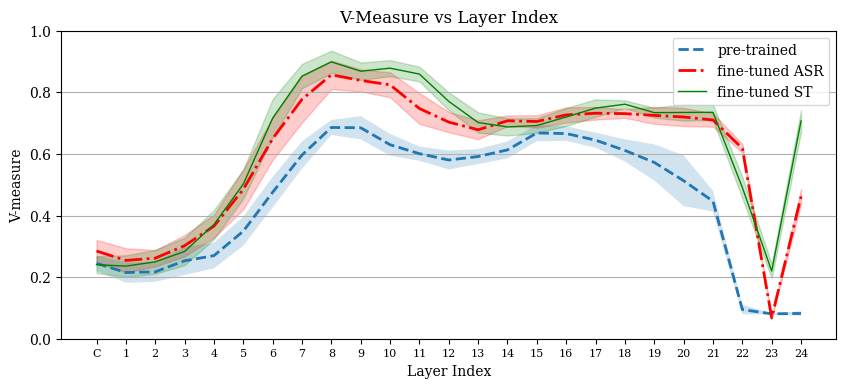

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Set the font family to LaTeX
plt.rcParams["font.family"] = "serif"

# FILEPATH: /nethome/babdullah/explore.speech.wav2vec2/visuallize_and_analyze_representations.ipynb
layer_indices = list(layer2vmeasure_pt.keys())

vmeasure_means_pt = [np.mean(layer2vmeasure_pt[layer_idx]) for layer_idx in layer_indices]
vmeasure_std_pt = [np.std(layer2vmeasure_pt[layer_idx]) for layer_idx in layer_indices]


vmeasure_means_ft_asr = [np.mean(layer2vmeasure_ft_asr[layer_idx]) for layer_idx in layer_indices]
vmeasure_std_ft_asr = [np.std(layer2vmeasure_ft_asr[layer_idx]) for layer_idx in layer_indices]

vmeasure_means_ft_s2t = [np.mean(layer2vmeasure_ft_s2t[layer_idx]) for layer_idx in layer_indices]
vmeasure_std_ft_s2t = [np.std(layer2vmeasure_ft_s2t[layer_idx]) for layer_idx in layer_indices]

fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the figsize parameter to make the plot wider

ax.plot(layer_indices, vmeasure_means_pt, '--', label='pre-trained', markersize=3, linewidth=2)
ax.plot(layer_indices, vmeasure_means_ft_asr, '-.', label='fine-tuned ASR', color='red', markersize=3, linewidth=2)
ax.plot(layer_indices, vmeasure_means_ft_s2t, '-', label='fine-tuned ST', color='green', markersize=3, linewidth=2)


ax.fill_between(layer_indices, np.array(vmeasure_means_pt) - np.array(vmeasure_std_pt), np.array(vmeasure_means_pt) + np.array(vmeasure_std_pt), alpha=0.2)
ax.fill_between(layer_indices, np.array(vmeasure_means_ft_asr) - np.array(vmeasure_std_ft_asr), np.array(vmeasure_means_ft_asr) + np.array(vmeasure_std_ft_asr), alpha=0.2, color='red')
ax.fill_between(layer_indices, np.array(vmeasure_means_ft_s2t) - np.array(vmeasure_std_ft_s2t), np.array(vmeasure_means_ft_s2t) + np.array(vmeasure_std_ft_s2t), alpha=0.2, color='green')

ax.set_ylim(0, 1)
ax.set_xlabel('Layer Index')
ax.set_ylabel('V-measure')
tickvalues = range(0, 25)
ax.set_xticks(ticks=tickvalues, labels=['C'] + list(range(1, 25, 1)), fontsize=8)

# Add grid only to the vertical axis
ax.yaxis.grid()

ax.set_title('V-Measure vs Layer Index')
ax.legend()

plt.show()


In [57]:
vmeasure_ft_s2t_mean, vmeasure_ft_asr_mean, vmeasure_pt_mean = np.mean(vmeasure_means_ft_s2t), np.mean(vmeasure_means_ft_asr), np.mean(vmeasure_means_pt)
vmeasure_ft_s2t_mean, vmeasure_ft_asr_mean, vmeasure_pt_mean 

(0.6263757227439729, 0.5973671065168397, 0.4554474032655305)

In [76]:
layer2vmeasure_pt_spkr= defaultdict(list)

for layer_idx in range(0, 25):
    layer_representations = [layer_reprs[sample_ID][layer_idx] for sample_ID in layer_reprs]

    for i, _rand in enumerate(random_seeds):
        kmeans = KMeans(init="k-means++", n_clusters=6, n_init='auto', random_state=_rand)
        clustering_perf = k_means(kmeans_paras=kmeans, data=layer_representations, labels=speaker_ids_encoded)
        
        #print(f"{i:.2f} Layer {layer_idx+1:<3} v-measure {clustering_perf[0]:.3f}", end='\n')
        layer2vmeasure_pt_spkr[layer_idx].append(clustering_perf[0])

In [77]:
layer2vmeasure_ft_asr_spkr= defaultdict(list)

for layer_idx in range(0, 25):
    layer_representations = [layer_reprs_ft_asr[sample_ID][layer_idx] for sample_ID in layer_reprs]

    for i, _rand in enumerate(random_seeds):
        kmeans = KMeans(init="k-means++", n_clusters=6, n_init='auto', random_state=_rand)
        clustering_perf = k_means(kmeans_paras=kmeans, data=layer_representations, labels=speaker_ids_encoded)
        
        #print(f"{i:.2f} Layer {layer_idx+1:<3} v-measure {clustering_perf[0]:.3f}", end='\n')
        layer2vmeasure_ft_asr_spkr[layer_idx].append(clustering_perf[0])

In [78]:
layer2vmeasure_ft_s2t_spkr= defaultdict(list)

for layer_idx in range(0, 25):
    layer_representations = [layer_reprs_ft_s2t[sample_ID][layer_idx] for sample_ID in layer_reprs]

    for i, _rand in enumerate(random_seeds):
        kmeans = KMeans(init="k-means++", n_clusters=6, n_init='auto', random_state=_rand)
        clustering_perf = k_means(kmeans_paras=kmeans, data=layer_representations, labels=speaker_ids_encoded)
        
        #print(f"{i:.2f} Layer {layer_idx+1:<3} v-measure {clustering_perf[0]:.3f}", end='\n')
        layer2vmeasure_ft_s2t_spkr[layer_idx].append(clustering_perf[0])

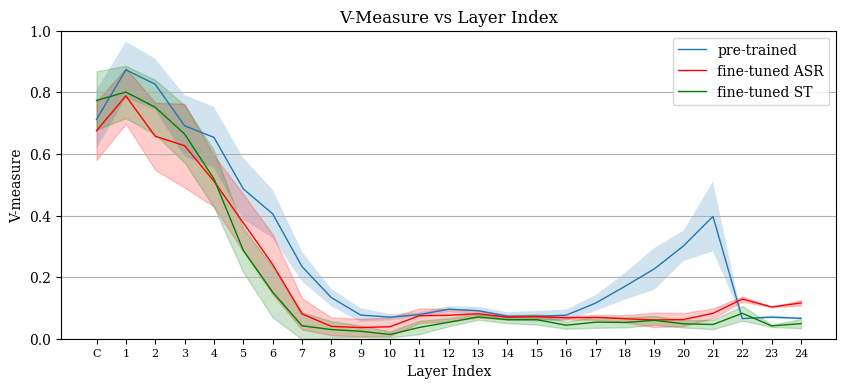

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Set the font family to LaTeX
plt.rcParams["font.family"] = "serif"

# FILEPATH: /nethome/babdullah/explore.speech.wav2vec2/visuallize_and_analyze_representations.ipynb
layer_indices = list(layer2vmeasure_pt.keys())

vmeasure_means_pt_spkr = [np.mean(layer2vmeasure_pt_spkr[layer_idx]) for layer_idx in layer_indices]
vmeasure_std_pt_spkr = [np.std(layer2vmeasure_pt_spkr[layer_idx]) for layer_idx in layer_indices]


vmeasure_means_ft_asr_spkr = [np.mean(layer2vmeasure_ft_asr_spkr[layer_idx]) for layer_idx in layer_indices]
vmeasure_std_ft_asr_spkr = [np.std(layer2vmeasure_ft_asr_spkr[layer_idx]) for layer_idx in layer_indices]

vmeasure_means_ft_s2t_spkr = [np.mean(layer2vmeasure_ft_s2t_spkr[layer_idx]) for layer_idx in layer_indices]
vmeasure_std_ft_s2t_spkr = [np.std(layer2vmeasure_ft_s2t_spkr[layer_idx]) for layer_idx in layer_indices]

fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the figsize parameter to make the plot wider

ax.plot(layer_indices, vmeasure_means_pt_spkr, '-', label='pre-trained', markersize=3, linewidth=1)
ax.plot(layer_indices, vmeasure_means_ft_asr_spkr, '-', label='fine-tuned ASR', color='red', markersize=3, linewidth=1)
ax.plot(layer_indices, vmeasure_means_ft_s2t_spkr, '-', label='fine-tuned ST', color='green', markersize=3, linewidth=1)

ax.fill_between(layer_indices, np.array(vmeasure_means_pt_spkr) - np.array(vmeasure_std_pt_spkr), np.array(vmeasure_means_pt_spkr) + np.array(vmeasure_std_pt_spkr), alpha=0.2)
ax.fill_between(layer_indices, np.array(vmeasure_means_ft_asr_spkr) - np.array(vmeasure_std_ft_asr_spkr), np.array(vmeasure_means_ft_asr_spkr) + np.array(vmeasure_std_ft_asr_spkr), alpha=0.2, color='red')
ax.fill_between(layer_indices, np.array(vmeasure_means_ft_s2t_spkr) - np.array(vmeasure_std_ft_s2t_spkr), np.array(vmeasure_means_ft_s2t_spkr) + np.array(vmeasure_std_ft_s2t_spkr), alpha=0.2, color='green')

ax.set_ylim(0, 1)
ax.set_xlabel('Layer Index')
ax.set_ylabel('V-measure')
tickvalues = range(0, 25)
ax.set_xticks(ticks=tickvalues, labels=['C'] + list(range(1, 25, 1)), fontsize=8)

# Add grid only to the vertical axis
ax.yaxis.grid()

ax.set_title('V-Measure vs Layer Index')
ax.legend()

plt.show()


In [84]:
vmeasure_ft_s2t_spkr_mean, vmeasure_ft_asr_spkr_mean, vmeasure_pt_spkr_mean = np.mean(vmeasure_means_ft_s2t_spkr), np.mean(vmeasure_means_ft_asr_spkr), np.mean(vmeasure_means_pt_spkr)
vmeasure_ft_s2t_spkr_mean, vmeasure_ft_asr_spkr_mean, vmeasure_pt_spkr_mean 

(0.1928290236250026, 0.2080916186116773, 0.28251335047527154)

In [86]:
(vmeasure_ft_s2t_spkr_mean - vmeasure_pt_spkr_mean ) / vmeasure_pt_spkr_mean, (vmeasure_ft_asr_spkr_mean - vmeasure_pt_spkr_mean ) / vmeasure_pt_spkr_mean

(-0.3174516414866526, -0.26342730967720546)